<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Jorge Calvo</h3>
    
<h1>Funciones de activación</h1>
    <h2>Redes neuronales</h2>

<h3>Sígueme en - <a href="https://www.linkedin.com/in/jorgecalvomartin/">LinkedIn</a>&nbsp; <a href="https://twitter.com/jorgemcalvo">Twitter</a>&nbsp; <a href="https://www.europeanvalley.es/noticias/">Blog</a>&nbsp;</h3>
</div>
    
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>.

</body>
</html>

In [1]:
import numpy as np
import math, random
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline  
from IPython.display import display, Math, Latex, HTML
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

### Función Sigmoide
La razón principal por la que usamos la función sigmoide es porque existe entre (0 a 1). Por lo tanto, se usa especialmente para modelos en los que tenemos que predecir la probabilidad como un resultado. Dado que la probabilidad de cualquier cosa existe solo entre el rango de 0 y 1

In [2]:
#Creamos la función sigmoide con lambda , donde lambda[0] es la sigmoide y lambda[1] es su derivada
sigm = (lambda x:1/(1+np.e**(-x)),lambda x:np.exp(-x)/(np.exp(-x)+1)**2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

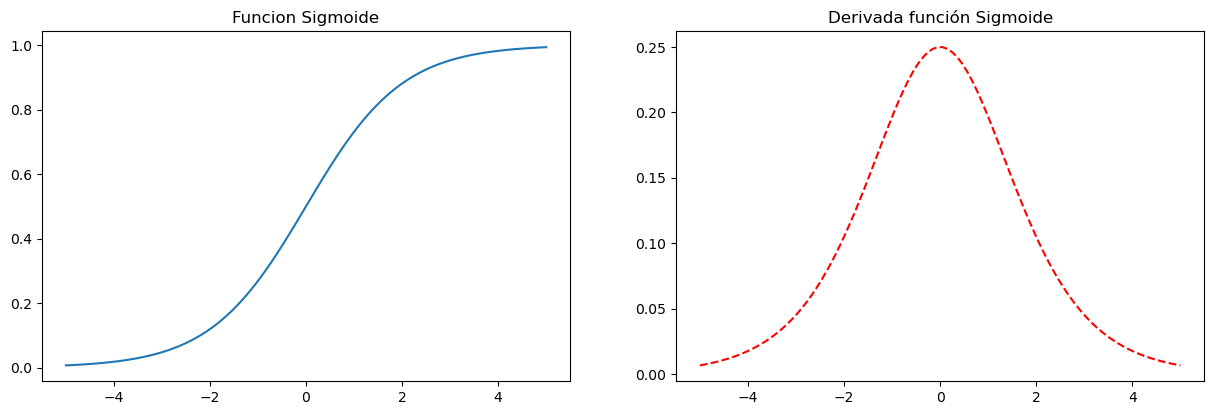

In [3]:
#Latex
display(Math(r'sigmoide(x) = \frac{1}{1+e^{-x}} '))
display(Math(r"$$sigmoide'(x) = \frac{e^{-x}}{(e^{-x}+1)^2}"))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,sigm[0](v))
plt.title("Funcion Sigmoide")
plt.subplot(222)
plt.plot(v,sigm[1](v), "--", color="red")
plt.title("Derivada función Sigmoide")
plt.show()

#### Características:
* Saturación: Para valores muy altos o muy bajos de x, la sigmoide se aplana (se aproxima a 1 o 0, respectivamente). Esto implica que para entradas extremas, el gradiente se vuelve muy pequeño (problema del vanishing gradient), dificultando la actualización de los pesos.
* No centrada en cero: Esto puede ocasionar que durante el entrenamiento la propagación del gradiente sea menos eficiente, ya que las salidas siempre son positivas.

#### Impacto en los filtros:
* Al aplicar la sigmoide, los filtros de la convolución pasan sus respuestas a un rango limitado, lo cual puede "suavizar" la información y, en algunos casos, hacer que se pierdan diferencias sutiles entre características.
* Además, la saturación puede hacer que ciertos filtros apenas contribuyan al aprendizaje si sus respuestas caen en las zonas planas de la función.

### Función Tangente hiperbólica o Gaussiana
Es una función similar a la Sigmoide pero produce salidas en escala de [-1, +1]. Además, es una función continua. En otras palabras, la función produce resultados para cada valor de x.

In [4]:
# Tangente Hiperbólica y su derivada
cosh = (lambda x: (np.e**(x) + np.e**(-x))/2) #Saco la función de coseno hiperbólico para la derivada de la tangh
tanh = (lambda x: (np.e**(x) - np.e**(-x))/(np.e**(x) + np.e**(-x)), lambda x: 1/cosh(x)**2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

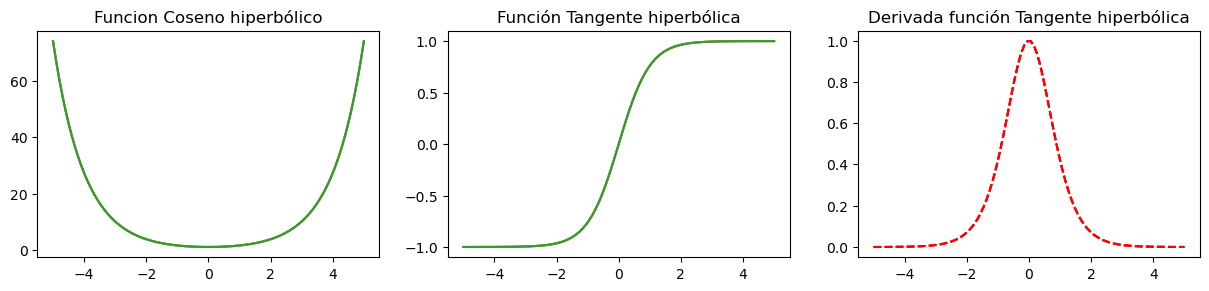

In [7]:
#Latex
display(Math(r'cosh(x) = \frac{e^{x} + e^{-x}}{2}'))
display(Math(r'tanh(x) = \frac{e^{x} - e^{-x}}{e^{-x} + e^{-x}} '))
display(Math(r"'tanh(x) = \frac{1}{\cosh^2{x}} "))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(331)
plt.plot(v,cosh(v))
plt.title("Funcion Coseno hiperbólico")
plt.subplot(332)
plt.plot(v,tanh[0](v))
plt.title("Función Tangente hiperbólica")
plt.subplot(333)
plt.plot(v,tanh[1](v), "--", color="red")
plt.title("Derivada función Tangente hiperbólica")
plt.savefig('tangente.png')
plt.show()

#### Características:
* Centrada en cero: Esto significa que los valores de activación están balanceados entre positivos y negativos, lo que ayuda a una propagación del gradiente más simétrica y puede conducir a una convergencia más rápida.
* Saturación similar a la sigmoide: Aunque mejora el tema del centrado, la tanh sigue saturándose para valores extremos, lo que puede disminuir el gradiente y ralentizar el aprendizaje en esos rangos.
#### Impacto en los filtros:
* La tanh permite que los filtros resalten tanto las activaciones positivas como las negativas. Esto puede ser beneficioso cuando la presencia o ausencia (incluso con signo negativo) de ciertas características es relevante.
* Sin embargo, la saturación sigue siendo un factor a considerar, ya que puede limitar la sensibilidad de algunos filtros ante variaciones sutiles en la entrada.

### Función RELU (Rectified Lineal Unit)
ReLU es la función de activación más utilizada en el mundo en este momento. Desde entonces, se utiliza en casi todas las redes neuronales convolucionales o el aprendizaje profundo.
Como puedes ver, ReLU está medio rectificado (desde abajo). f(z) es cero cuando z es menor que cero y f(z) es igual a z cuando z es superior o igual a cero.
Es una función usada en las capas ocultas de nuestra red neuronal, NO en las de salida

In [8]:
#Relu Rectified Lineal Unit
relu = (lambda x: np.maximum(0,x), lambda x: 1. * (x > 0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

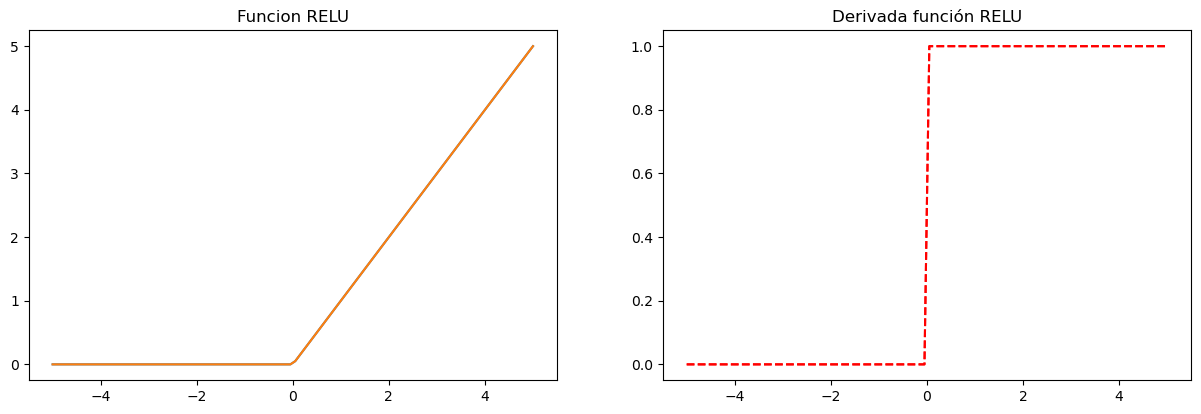

In [10]:
#Latex
display(Math(r'relu(x) = \max(0,x) '))
display(Math(r"'relu(x) = 1.(x>0) "))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,relu[0](v))
plt.title("Funcion RELU")
plt.subplot(222)
plt.plot(v,relu[1](v), "--", color="red")
plt.title("Derivada función RELU")
plt.savefig('relu.png')
plt.show()

#### Características:
* No saturante para x>0: La derivada es constante (1) en la región positiva, lo que ayuda a que el gradiente fluya de manera eficiente durante el entrenamiento.
* Sparsity: Al establecer a cero todos los valores negativos, se produce un efecto de "sparse activation" (activaciones dispersas). Esto puede ayudar a enfocar el aprendizaje en las características más relevantes.
* Problema de neuronas muertas: Si un filtro (o neurona) se ve constantemente con entradas negativas, puede dejar de actualizarse (quedarse "muerta") y no aprender nada.

#### Impacto en los filtros:
* Con ReLU, los filtros responden de manera más directa y sin saturación a los patrones relevantes presentes en la imagen.
* La eliminación de valores negativos puede ayudar a enfatizar la presencia de características, pero a costa de perder información sobre la "dirección" (signo) de la activación, lo que en algunos contextos puede ser una limitación.

### Leaky-ReLU
Leaky-ReLU es una mejora del valor predeterminado principal de ReLU, en el sentido de que puede manejar los valores negativos bastante bien, pero aún presenta no linealidad.

$ LRelu(x)=max(0.01x,x) $

$
\begin{equation}
     LRelu'(x) = \left\{
	       \begin{array}{ll}
		 1      & \mathrm{si\ } x > 0 \\
		 0.01 & \mathrm{si\ } x < 0 \\
	       \end{array}
	     \right.
   \end{equation}
$

In [11]:
lrelu = (lambda x: np.maximum(0.01*x,x), lambda x: 1. if (x > 0) else 0.01)

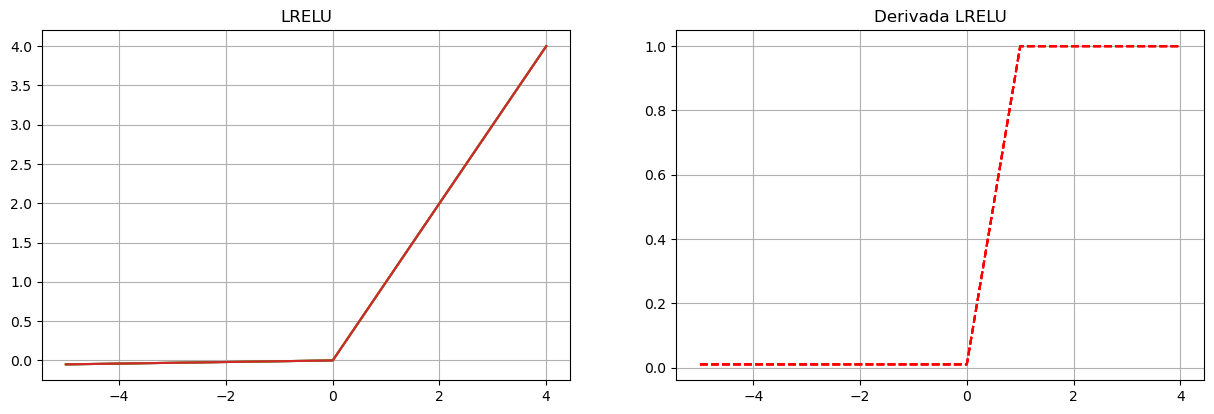

In [12]:
plt.figure(1,figsize=(15,10))
for u in range(1, 5):
    inputs = [x for x in range(-5, 5)]
    outputs = [lrelu[0](x) for x in inputs]
    output_prime = [lrelu[1](x) for x in inputs]
    plt.subplot(221)
    plt.grid(visible=True)
    plt.title("LRELU")
    plt.plot(inputs, outputs)
    plt.subplot(222)
    plt.grid(visible=True)
    plt.title("Derivada LRELU")
    plt.plot(inputs, output_prime, "--", color="red")

plt.show()

### Definición de softmax:
La función softmax toma un vector de logits y calcula el exponente de cada uno (ajustado restando el máximo para evitar números muy grandes) y luego divide cada valor por la suma total de esos exponentes. Esto convierte los logits en una distribución de probabilidades que suma 1.

**Simulación de logits:**
El vector logits simula las salidas de la última capa (por ejemplo, después de aplanar la salida de una red convolucional). Estos valores no representan probabilidades hasta que se les aplica softmax.

**Cálculo de probabilidades:**
Aplicamos la función softmax sobre los logits para obtener el vector probabilidades, que contiene valores entre 0 y 1 para cada clase.

**Visualización:**
Se generan dos gráficos de barras:

Izquierda: Muestra los logits originales.
Derecha: Muestra las probabilidades obtenidas con softmax, ilustrando cómo se distribuyen los "pesos" de cada clase.

Logits: [ 2.5  1.   0.5 -1.   3. ]
Probabilidades (Softmax): [0.32923067 0.07346129 0.04455653 0.0099419  0.54280961]


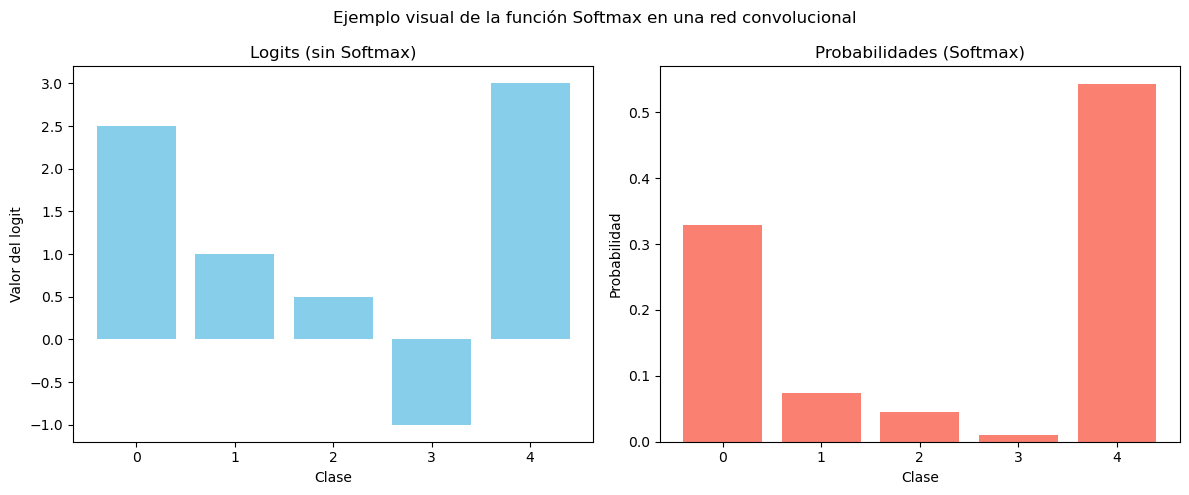

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(logits):
    """
    Calcula la función softmax de un vector de logits.
    Se resta el máximo de los logits para mayor estabilidad numérica.
    """
    exps = np.exp(logits - np.max(logits))
    return exps / np.sum(exps)

# Supongamos que estos son los logits (salidas sin normalizar) de la última capa de una red convolucional.
# Por ejemplo, para una clasificación en 5 clases.
logits = np.array([2.5, 1.0, 0.5, -1.0, 3.0])
probabilidades = softmax(logits)

print("Logits:", logits)
print("Probabilidades (Softmax):", probabilidades)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de los logits
clases = np.arange(len(logits))
axes[0].bar(clases, logits, color='skyblue')
axes[0].set_title('Logits (sin Softmax)')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Valor del logit')
axes[0].set_xticks(clases)

# Gráfico de las probabilidades resultantes del softmax
axes[1].bar(clases, probabilidades, color='salmon')
axes[1].set_title('Probabilidades (Softmax)')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Probabilidad')
axes[1].set_xticks(clases)

fig.suptitle('Ejemplo visual de la función Softmax en una red convolucional')
plt.tight_layout()
plt.show()
